# Why are our best and most experienced employees leaving prematurely?

* To Do
    * Create functions for graphs and model creation.

# Introduction:

This project analyzes the Human Resource Analytics dataset from Kaggle with the hopes of determining what causes the best employees to leave their jobs too early. 

We'll first clean the data, then explore the data, and finally use the data and build an algorithm to predict and generalize if an employee will leave heir job too early.  

# Data Preprocessing

We want to clean the data in such a way as to minimize data loss and instead improve our data density.  So instead of removing rows with null values, we can take the mean for instance. Or for categorical variables, we'll create new features out of them in order to be able to use them.

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools
from sklearn.utils import shuffle
import tpot
%matplotlib inline
plt.style.use('fivethirtyeight')

In [262]:
df = pd.read_csv('../data/HR_comma_sep.csv')
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


* Let's count the of of different categories in our categorical variables
* Binary Categorical Variables: left, promotion_last_5years, sales, salary, work_accident
* Multi-class Categorical Variables: number_project,time spend_company


In [264]:
def plot_variables(variable_list = categorical_vars, file_location='../figures/categorical_vars.png'):
    fig=plt.subplots(figsize=(10,15))
    for i,j in itertools.zip_longest(variable_list,range(len(variable_list))): # itertools.zip_longest for to execute the longest loop
        plt.subplot(np.ceil(len(variable_list)/2),2,j+1)
        plt.subplots_adjust(hspace=.5)
        sns.countplot(x=i,data = df)
        plt.xticks(rotation=90)
    #     plt.title("No. of employee")
        # Get current axis on current figure
        ax = plt.gca()

        # Iterate through the list of axes' patches
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                    fontsize=12, color='black', ha='center', va='bottom')
    plt.savefig(file_location)

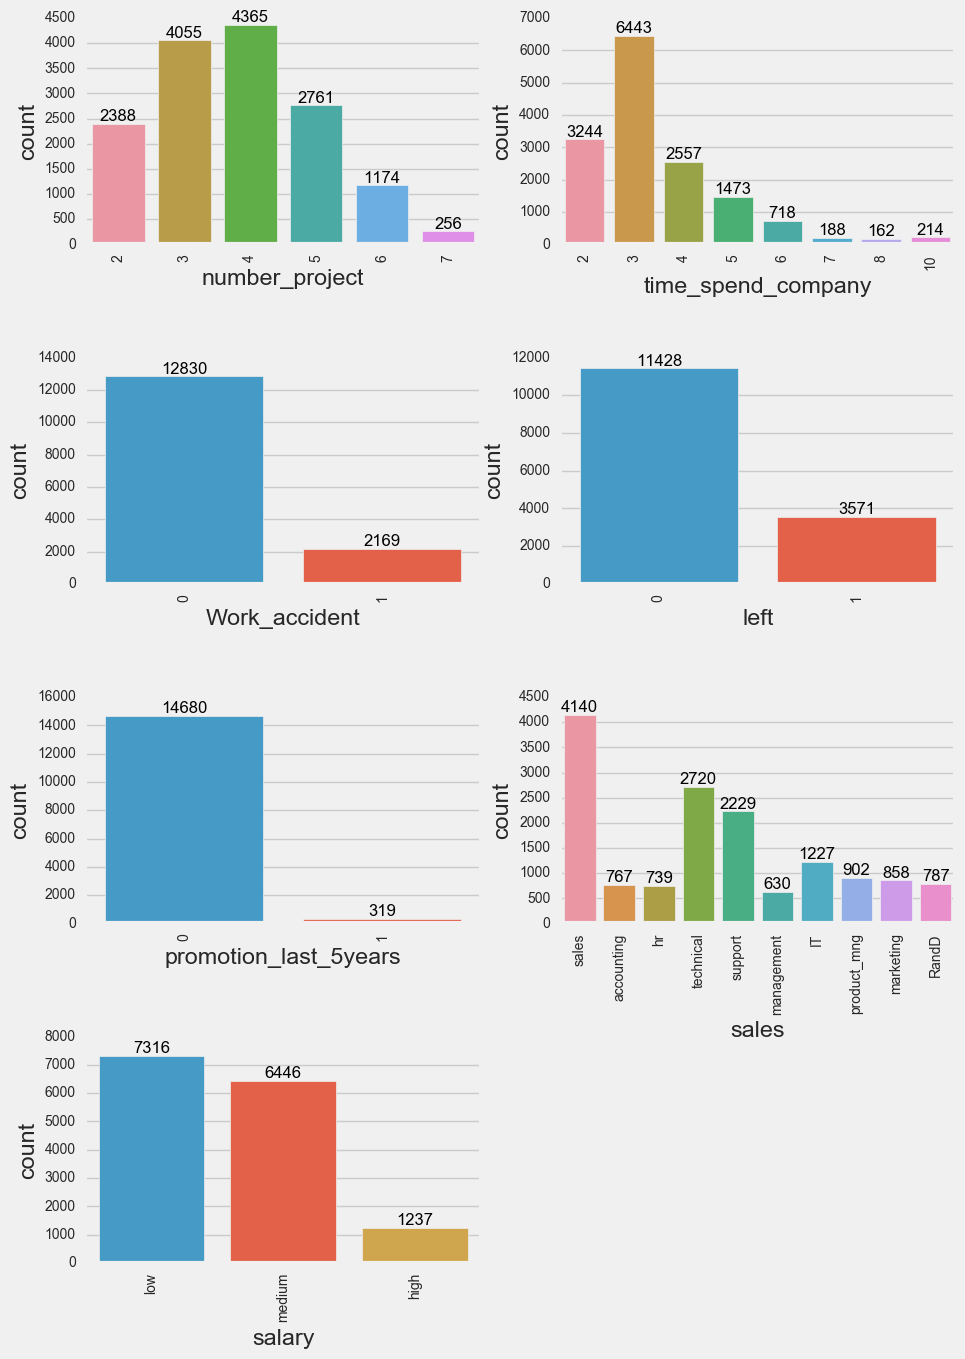

In [265]:
categorical_vars=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']
plot_variables(variable_list = categorical_vars, file_location='../figures/categorical_vars.png')

 **Notes/Observations from graphs**

1. Most employees are doing between 3-5 projects

2. Looks like most people stay for 3 years but then you see a cliff between 3 and 4 years where a lot of people seem to leave.

3. Our data is imbalanced aka it's not a 50 50 split. Rather we have 20% of records where the employee left.

4. There aren't many promotions in our dataset

5. Sales is the largest department followed by technical and support

6. A small percentage of employees have high salaries

In [267]:
def plot_employees_left(variable_list = categorical_vars, file_location='../figures/categorical_vars_employees_that_left.png'):
    fig=plt.subplots(figsize=(12,15))# to define the size of figure
    for i,j in itertools.zip_longest(variable_list,range(len(variable_list))):
        plt.subplot(np.ceil(len(variable_list)/2),2,j+1)
        plt.subplots_adjust(hspace=.5)
        sns.countplot(x=i,data = df,hue="left")
        plt.xticks(rotation=90) 
        plt.title("Employees That Left") # to plot the title of graph
        try:
            ax = plt.gca()

            # Iterate through the list of axes' patches
            for p in ax.patches:
                ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                        fontsize=12, color='black', ha='center', va='bottom')
        except:
            pass
    plt.savefig(file_location)

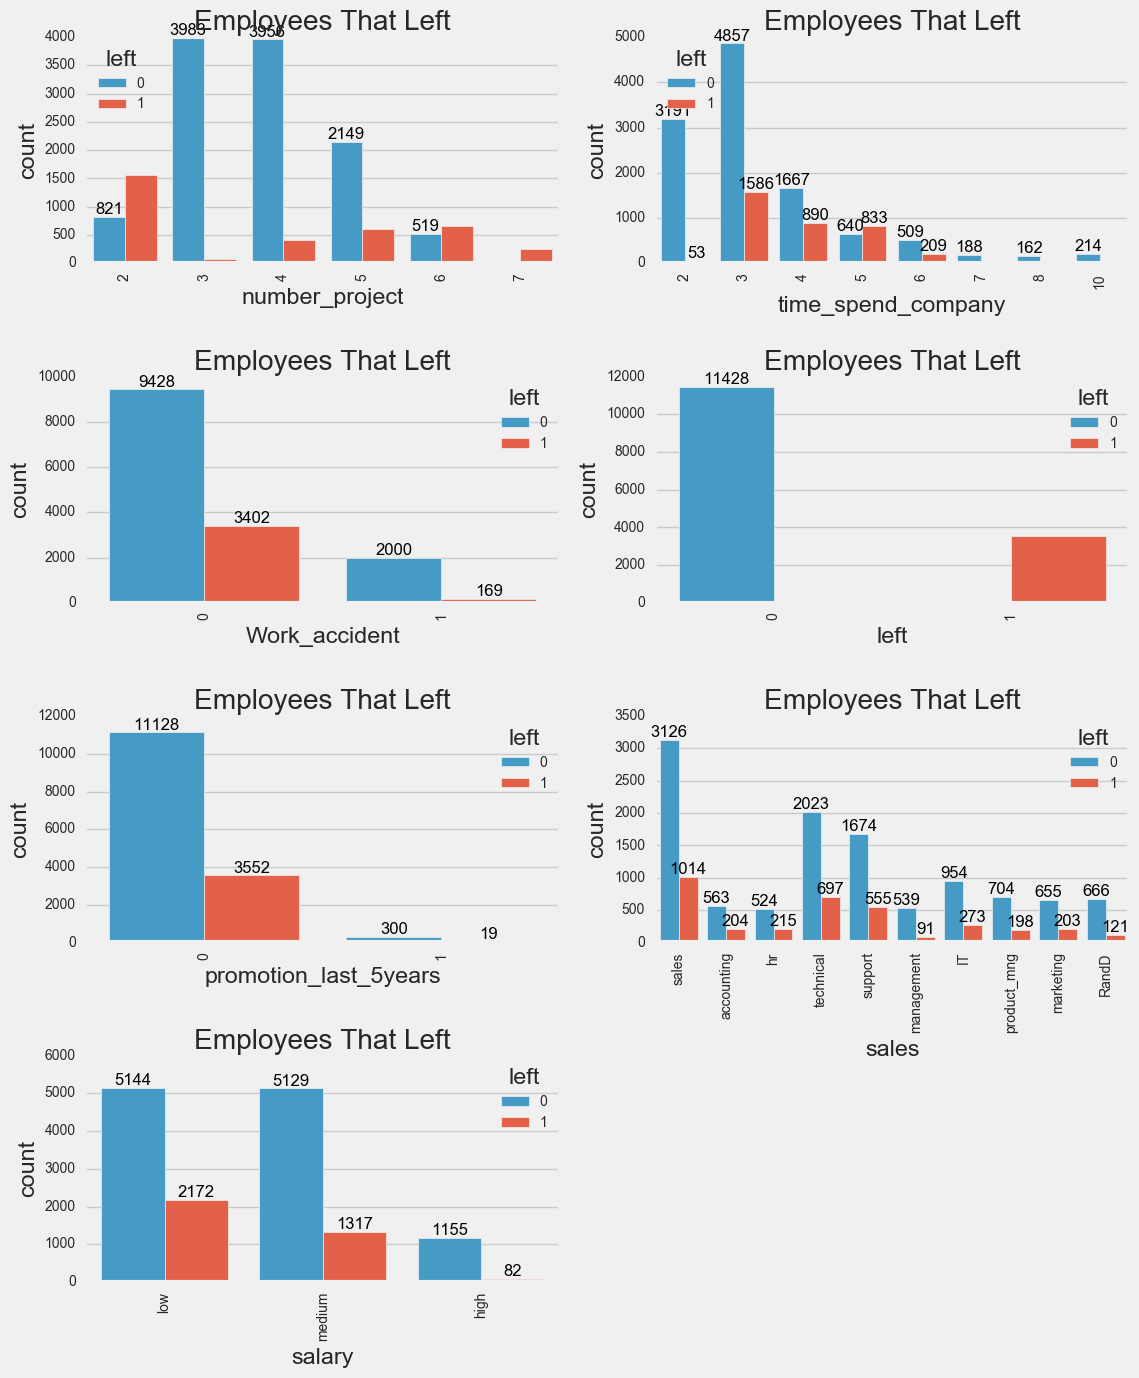

In [268]:
plot_employees_left(variable_list = categorical_vars, file_location='../figures/categorical_vars_employees_that_left.png')

**Notes/Observations from graphs**
1. Those who were put on too many projects (6/7), or similarily not enough projects (2) left more times than stayed.
2. 5 years seems to be the tipping point for staying with the company. If you get to 5 years, you either have to make the choice to be a lifer or leave it seems.
3. Work accidents don't seem to be indicative or whether a person left or stayed.
4. If you're promoted in the last 5 years, you don't typically leave.
5. Sales has the largest department and thus the largest gross volume of people staying and leaving.  This leads me to want to change our numbers into proportions so we can adjust for such imbalances. 
6. If you make a high salary there doesn't seem to be a reason to leave.

In [273]:
def plot_employees_left_proportion(variable_list = categorical_vars, file_location='../figures/categorical_vars_employees_that_left_proportion.png'):
    fig=plt.subplots(figsize=(15,15))
    for i,j in itertools.zip_longest(variable_list,range(len(variable_list))):# itertools.zip_longest for to execute the longest loop
        Proportion_of_data = df.groupby([i])['left'].agg(lambda x: (x==1).sum()).reset_index()# only counting the number who left 
        Proportion_of_data1= df.groupby([i])['left'].count().reset_index() # Counting the total number 
        Proportion_of_data2 = pd.merge(Proportion_of_data,Proportion_of_data1,on=i) # mergeing two data frames
        # Now we will calculate the % of employee who left category wise
        Proportion_of_data2["Proportion"]=(Proportion_of_data2['left_x']/Proportion_of_data2['left_y'])*100 
        Proportion_of_data2=Proportion_of_data2.sort_values(by="Proportion",ascending=False).reset_index(drop=True)#sorting by percentage
        plt.subplot(np.ceil(len(categorical_vars)/2),2,j+1)
        plt.subplots_adjust(hspace=.5)
        sns.barplot(x=i,y='Proportion',data=Proportion_of_data2)
        plt.xticks(rotation=90)
        plt.title("Proportion of Employees That Left For Each Variable")
        plt.ylabel('Proportion')
        plt.ylim(0,110)
        try:
            ax = plt.gca()

            # Iterate through the list of axes' patches
            for p in ax.patches:
                ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                        fontsize=12, color='black', ha='center', va='bottom')
        except:
            pass
    plt.savefig(file_location)

In [271]:
categorical_vars2=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary']

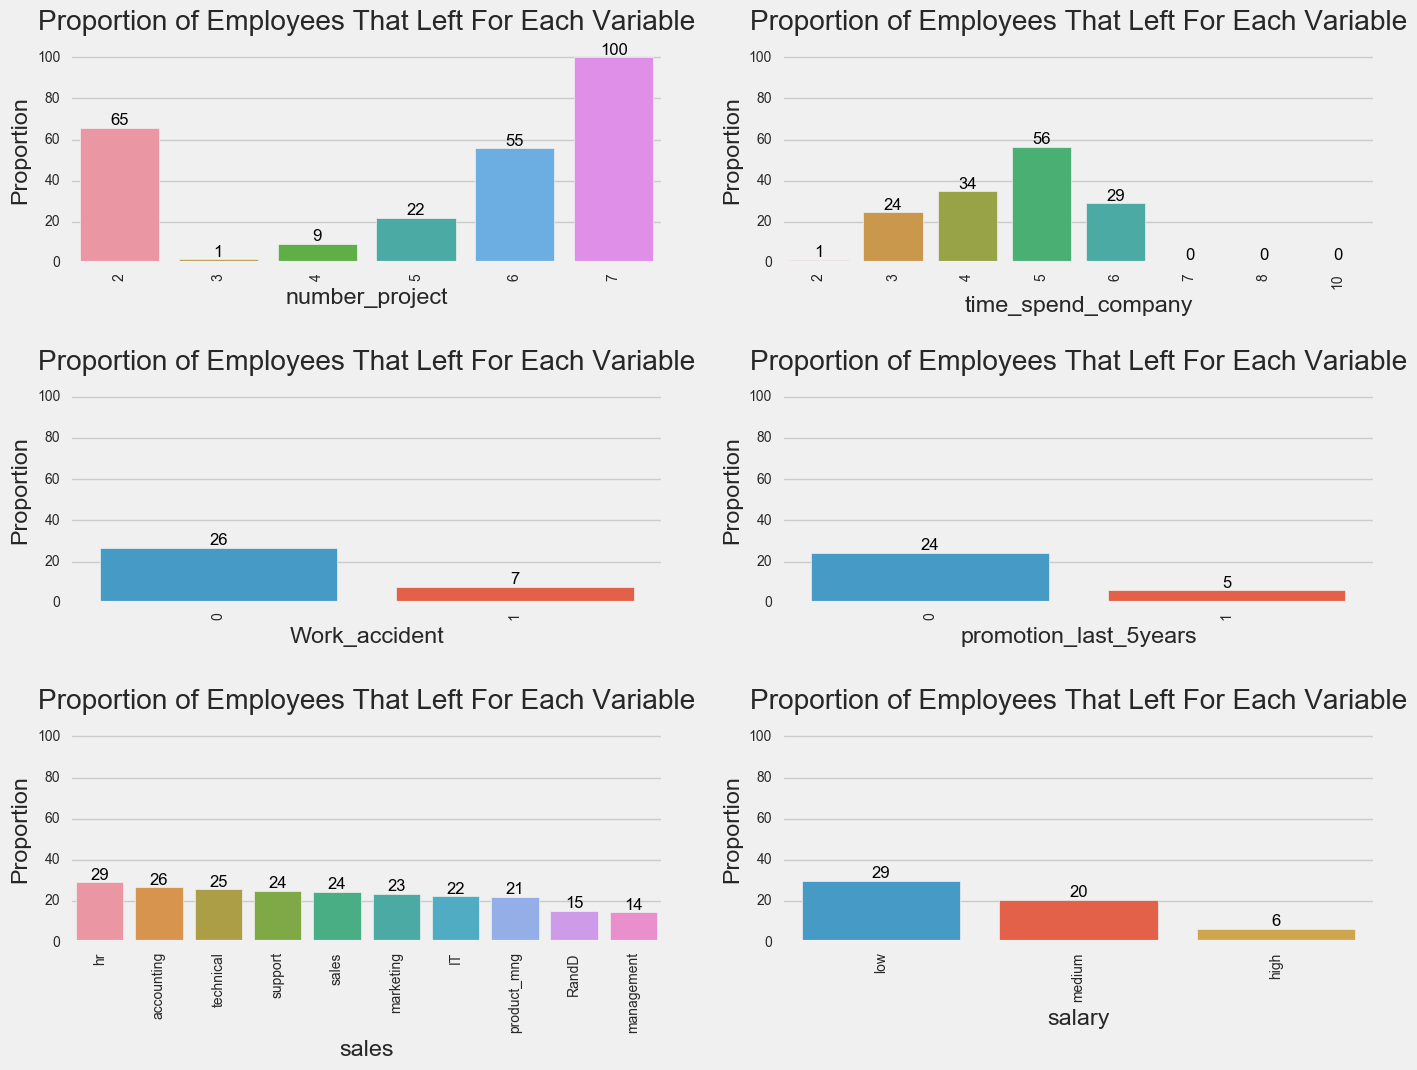

In [274]:
plot_employees_left_proportion(variable_list = categorical_vars2, file_location='../figures/categorical_vars_employees_that_left_proportion.png')

**Notes/Observations from graphs**

1. As noticed previously, but strengthened in the first graph, the sweet spot for projects is between 3-5. 100% of people that had 7 projects left the company.

2. The 2nd graph seems gaussian, where the likelihood of leaving increases until you reach 5 years and then decreases from then on.

3. Taking a look at the Sales category, we finally see the truth. Even though it seemed like the sales department had the worst track record of all for losing people, it's really HR.  HR lost 29% of their employees in this dataset.  On the other end, management stays more, which makes sense as management usually means higher salary / promotions / other features that correlate with retention.


## Who's getting promoted?

In [275]:
categorical_vars=['number_project','time_spend_company','sales','salary']

In [278]:
def plot_employees_promoted_percentage(variable_list = categorical_vars, file_location='../figures/categorical_vars_employees_that_left_promotions.png'):
    fig=plt.subplots(figsize=(15,15))
    # length=len(categorical_vars)
    for i,j in itertools.zip_longest(variable_list,range(len(variable_list))):
        Proportion_of_data = df.groupby([i])['promotion_last_5years'].agg(lambda x: ( x == 1).sum()).reset_index()
        Proportion_of_data1=df.groupby([i])['promotion_last_5years'].count().reset_index()
        Proportion_of_data2 = pd.merge(Proportion_of_data,Proportion_of_data1,on=i)

        Proportion_of_data2["Proportion"]=(Proportion_of_data2['promotion_last_5years_x']/Proportion_of_data2['promotion_last_5years_y'])*100 

        Proportion_of_data2=Proportion_of_data2.sort_values(by="Proportion",ascending=False).reset_index(drop=True)

        plt.subplot(np.ceil(len(variable_list)/2),2,j+1)
        plt.subplots_adjust(hspace=.3)
        sns.barplot(x=i,y='Proportion',data=Proportion_of_data2)
        plt.xticks(rotation=90)
        plt.title("Pecentage of employee getting promotion")
        plt.ylabel('Percentage')

        plt.ylim(0,25)
        try:
            ax = plt.gca()

            # Iterate through the list of axes' patches
            for p in ax.patches:
                ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                        fontsize=12, color='black', ha='center', va='bottom')
        except:
            pass
    plt.savefig(file_location)

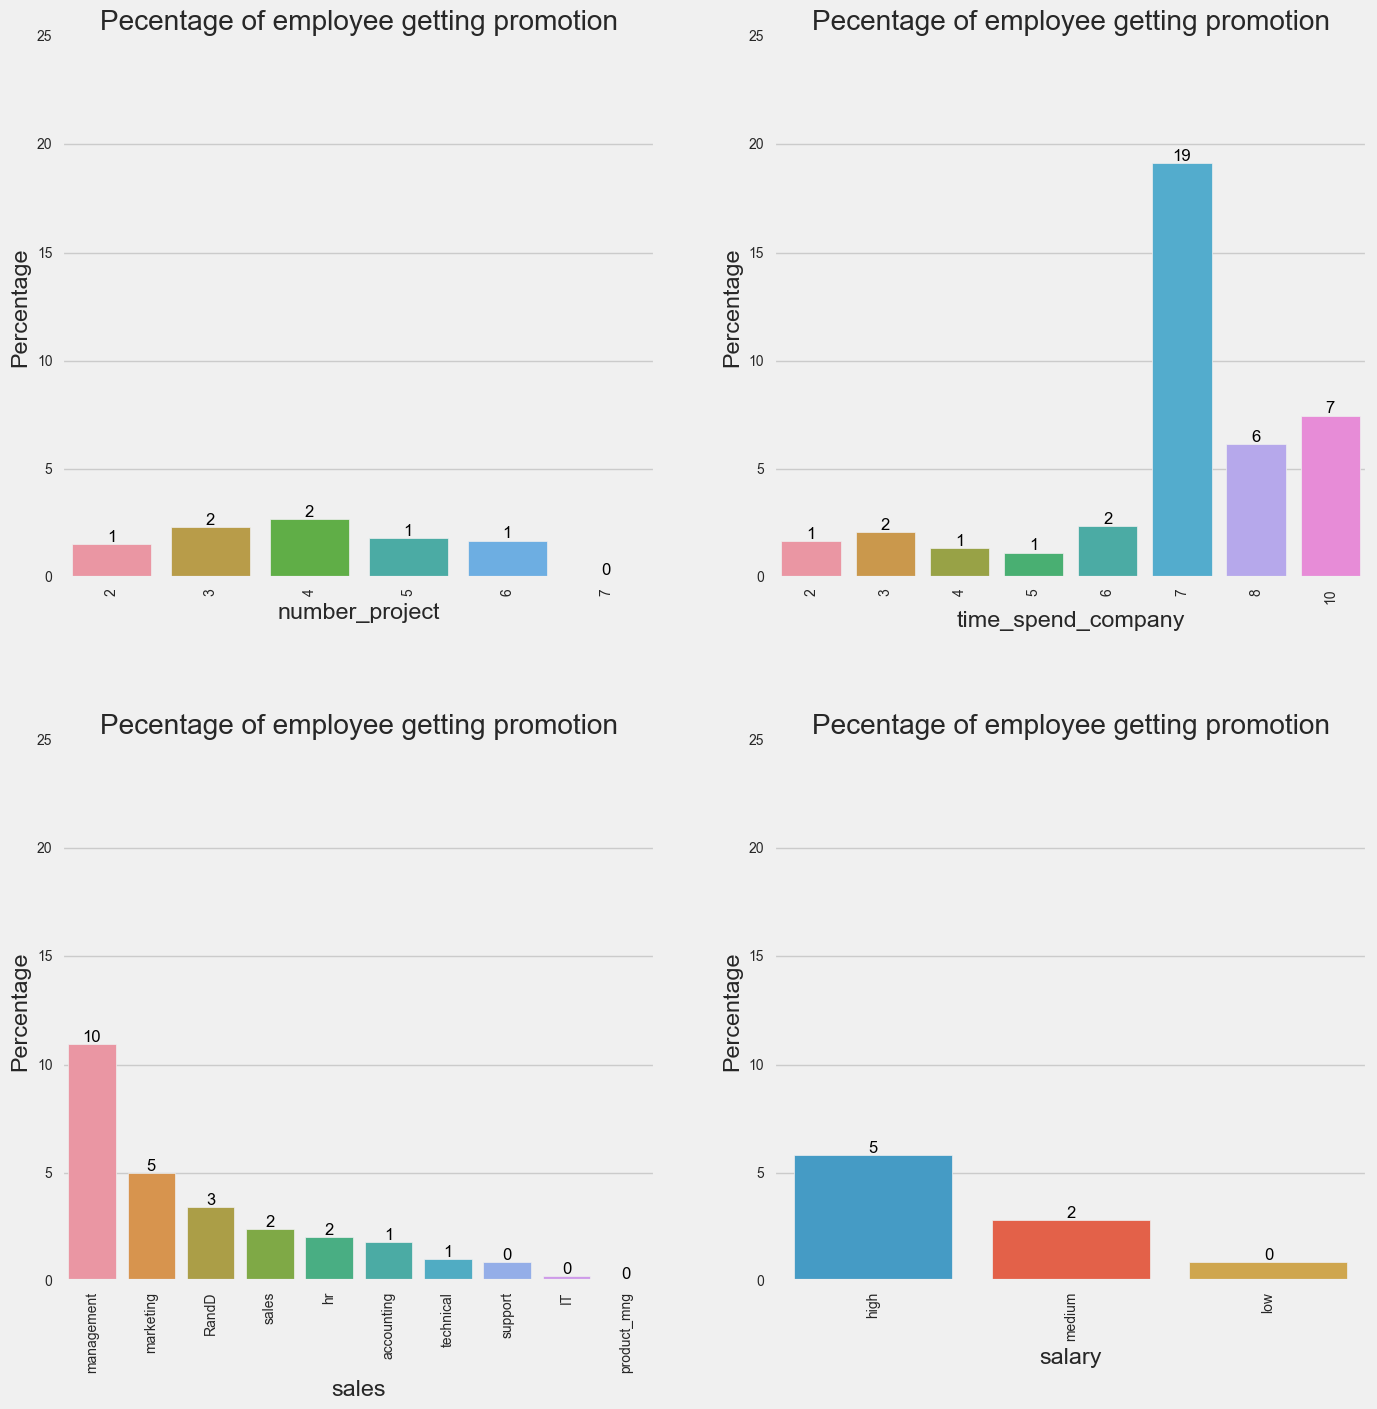

In [279]:
plot_employees_promoted_percentage(variable_list = categorical_vars, file_location='../figures/categorical_vars_employees_that_left_promotions.png')

In [281]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text xticklabel objects>)

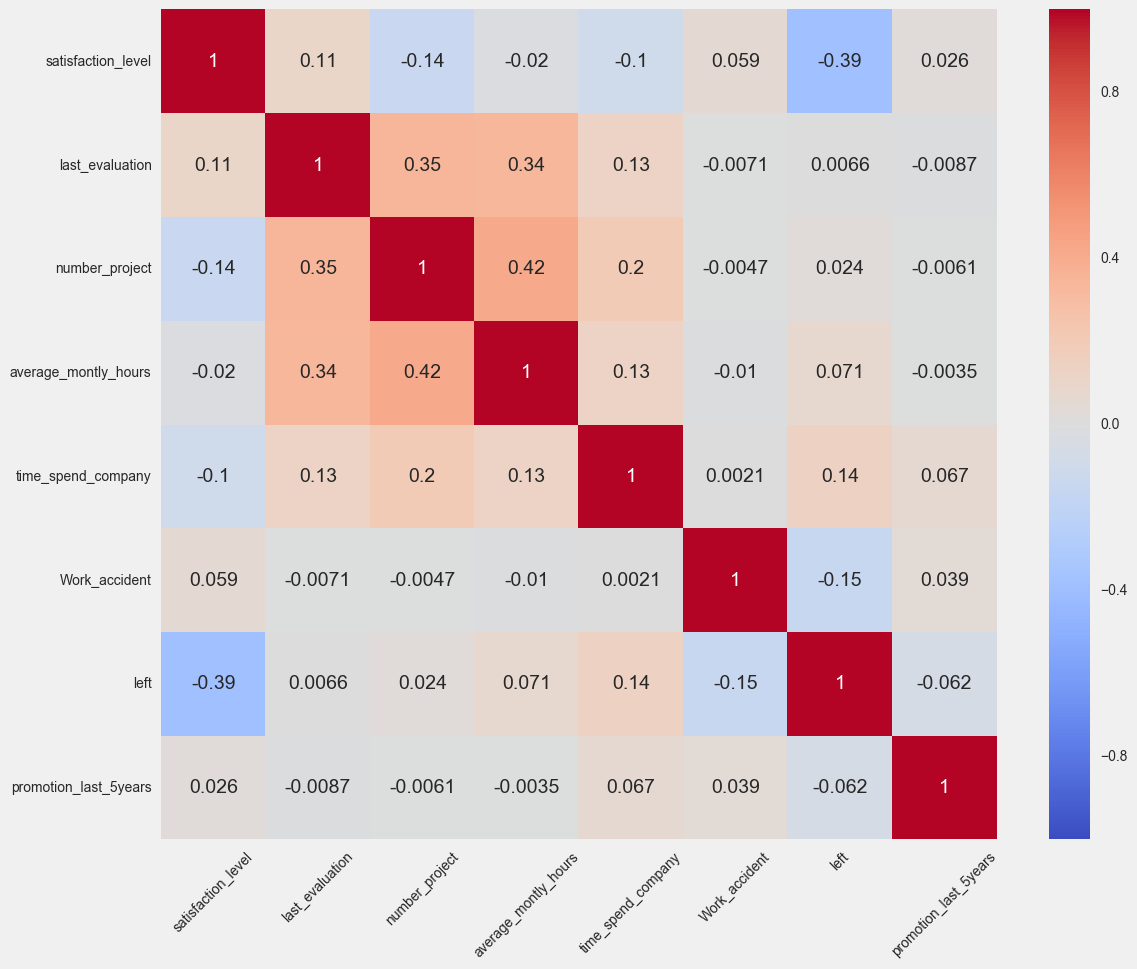

In [284]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=45)

## Let's transform our dummy categories

In [286]:
from sklearn.preprocessing import LabelEncoder # For change categorical variable into int
dummy=LabelEncoder()
df['salary']=dummy.fit_transform(df['salary'])
df['sales']=dummy.fit_transform(df['sales'])

In [291]:
# Create dummy variables for all the departments

sales = pd.get_dummies(df.sales)

sales.columns = ["IT", "RandD", "accounting", "hr", "management", "marketing", "product_mng", "sales_department", "support", "technical"]

sales.head()


# Create dummy variables for the salary

salary = pd.get_dummies(df.salary)

salary.columns = ['low', 'medium', 'high']

salary.head()

# Create dummy variable for stayed/left

# left = pd.get_dummies(df.left)

# left.columns = ['left', 'stayed']

# left.head(10)

# Concatenate the original dataset with the newly created salary and sales dummified variables

df = pd.concat([df, salary, sales], axis = 1)

# df.head(10)



In [295]:
df = df.drop('sales',axis = 1)
df = df.drop('salary',axis = 1)

In [296]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales_department,support,technical
0,0.38,0.53,2,157,3,0,1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Model

* We're going to shuffle, sort, and normalize.
* In the future I may implement grid search to optimize parameters

In [406]:
# Importing Machine learning models library used for classification
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn import metrics, preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.cross_validation import cross_val_score
from sklearn import metrics
import matplotlib.patheffects as path_effects
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Finding Feature Importances
* Here we'll use a Random Forest Classifier to find out which features determine our target variable's outcome the best.  So we're finding out our inter feature variability.
* For more information, check out [Plot Feature Importances - Scikit](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

In [298]:
model= RandomForestClassifier(n_estimators=100)
feature_var = df.ix[:,df.columns != "left"]
pred_var = df.ix[:,df.columns=='left']
model.fit(feature_var,pred_var.values.ravel())
featimp = pd.Series(model.feature_importances_,index=feature_var.columns).sort_values(ascending=False)
print(featimp)

satisfaction_level       0.293630
time_spend_company       0.192137
number_project           0.185584
average_montly_hours     0.159666
last_evaluation          0.119661
Work_accident            0.009914
medium                   0.009061
low                      0.005213
high                     0.003645
technical                0.003573
sales_department         0.003126
support                  0.002695
promotion_last_5years    0.001893
IT                       0.001735
RandD                    0.001631
management               0.001620
accounting               0.001595
hr                       0.001452
marketing                0.001085
product_mng              0.001083
dtype: float64


In [299]:
X = df.ix[:,df.columns != "left"]
y = df.ix[:,df.columns=='left']

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [301]:
def Classification_model(model,Data,x,y): # here x is the variable which are used for prediction
    # y is the prediction variable
    train,test = train_test_split(Data,test_size= 0.33)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    model.fit(train_x,train_y.values.ravel())
    pred=model.predict(test_x)
    accuracy=accuracy_score(test_y,pred)
    return accuracy

In [307]:
All_features=X.columns
print(All_features)
Important_features = ['satisfaction_level',
'number_project','time_spend_company',
'average_montly_hours','last_evaluation']
print(Important_features)
Pred_var = ["left"]
print(Pred_var)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'low', 'medium', 'high', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng',
       'sales_department', 'support', 'technical'],
      dtype='object')
['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation']
['left']


In [309]:
# Lets us make a list of models
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
Classification_models = [RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=5),LogisticRegression(),SVC()]
Model_Accuracy = []
for model in Classification_models:
    Accuracy=Classification_model(model,df,All_features,Pred_var)
    Model_Accuracy.append(Accuracy)

In [310]:
Accuracy_with_all_features = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with all features":Model_Accuracy
     
    })

In [311]:
Accuracy_with_all_features.sort_values(by="Accuracy with all features",ascending=False).reset_index(drop=True)

,Accuracy with all features,Classification Model
0,0.990707,RandomForestClassifier
1,0.946667,Support_Vector
2,0.933737,KNN
3,0.791111,Logistic_Regression
4,0.664444,Gaussian Naive Bays


In [312]:
# Lets try with Important features
Model_Accuracy = []
for model in Classification_models:
    Accuracy=Classification_model(model,df,Important_features,Pred_var) # Just instead of all features give only important features
    Model_Accuracy.append(Accuracy)

Accuracy_with_important_features = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with Important features":Model_Accuracy
     
    })
Accuracy_with_important_features.sort_values(by="Accuracy with Important features",ascending=False).reset_index(drop=True)

,Accuracy with Important features,Classification Model
0,0.989899,RandomForestClassifier
1,0.956162,Support_Vector
2,0.948081,KNN
3,0.811717,Gaussian Naive Bays
4,0.766061,Logistic_Regression


In [313]:
def Classification_model_CV(model,Data,x,y): # here x is the variable which are used for prediction
    # y is the prediction variable
    data_x = Data.ix[:,x] # Here no need of training and test data because in cross validation it splits data into 
    
    # train and test itself # data_x repersent features
    data_y = Data.ix[:,y] # data for predication
    data_y=data_y.values.ravel()
#     scores= cross_val_score(model,data_x,data_y,scoring="accuracy",cv=10)
    scores= cross_val_score(model,data_x,data_y,scoring="f1",cv=10)
    print(scores) # print the scores
    
    print('')
    accuracy=scores.mean()
    return accuracy

In [316]:
Model_Accuracy = []
for model,z in zip(Classification_models,models):
    print('')

    print(z) # Print the name of model
    Accuracy=Classification_model_CV(model,df,Important_features,Pred_var)
    
    Model_Accuracy.append(Accuracy)
Accuracy_with_CV = pd.DataFrame(
    { "Classification Model" :models,
     "F1 with CV":Model_Accuracy
     
    })
Accuracy_with_CV.sort_values(by="F1 with CV",ascending=False).reset_index(drop=True)


RandomForestClassifier
[ 0.99721448  0.9958159   0.96521739  0.95402299  0.95182482  0.98873239
  0.9972067   0.9958159   0.9986014   1.        ]


Gaussian Naive Bays
[ 0.5536      0.48105437  0.57377049  0.55172414  0.52131148  0.52931854
  0.55279503  0.48039216  0.47246892  0.41935484]


KNN
[ 0.90469799  0.88827586  0.9001368   0.8885906   0.88918919  0.88977424
  0.89516129  0.89251701  0.91966759  0.91666667]


Logistic_Regression
[ 0.37453184  0.32818533  0.36084453  0.37593985  0.36904762  0.36742424
  0.35203095  0.33333333  0.30670927  0.2812983 ]


Support_Vector
[ 0.91632373  0.89875173  0.90681502  0.91310345  0.90733057  0.90958904
  0.91966759  0.90959666  0.93239437  0.93333333]



,Classification Model,F1 with CV
0,RandomForestClassifier,0.984445
1,Support_Vector,0.914691
2,KNN,0.898468
3,Gaussian Naive Bays,0.513579
4,Logistic_Regression,0.344935


In [317]:
def Classification_model_CV_scaled(model,Data,x,y): # here x is the variable which are used for prediction
    # y is the prediction variable
    data_x = Data.ix[:,x] # Here no need of training and test data because in cross validation it splits data into 
    #Non Neg
    min_max_scale = preprocessing.MinMaxScaler().fit(data_x)
    data_x = min_max_scale.transform(data_x)
    # train and test itself # data_x repersent features
    data_y = Data.ix[:,y] # data for predication
    data_y=data_y.values.ravel()
#     scores= cross_val_score(model,data_x,data_y,scoring="accuracy",cv=10)
    scores= cross_val_score(model,data_x,data_y,scoring="f1",cv=10)
    print(scores) # print the scores
    
    print('')
    accuracy=scores.mean()
    return accuracy

In [318]:
Model_Accuracy = []
for model,z in zip(Classification_models,models):
    print(z) # Print the name of model
    print('')
    Accuracy=Classification_model_CV_scaled(model,df,Important_features,Pred_var)
    
    Model_Accuracy.append(Accuracy)
Accuracy_with_CV = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with CV":Model_Accuracy
     
    })
Accuracy_with_CV.sort_values(by="Accuracy with CV",ascending=False).reset_index(drop=True)

RandomForestClassifier

[ 0.9958159   0.9958159   0.96671491  0.95539568  0.95335277  0.98734177
  0.9972067   0.9958159   0.9986014   1.        ]

Gaussian Naive Bays

[ 0.5536      0.48105437  0.57377049  0.55172414  0.52131148  0.52931854
  0.55279503  0.48039216  0.47246892  0.41935484]

KNN

[ 0.9506347   0.93103448  0.92372881  0.89402174  0.91036415  0.92887029
  0.9368864   0.92877493  0.95851216  0.94134478]

Logistic_Regression

[ 0.37453184  0.32882012  0.36398467  0.37593985  0.36904762  0.36812144
  0.35203095  0.33333333  0.30769231  0.28173375]

Support_Vector

[ 0.88515406  0.86049927  0.86036671  0.85434174  0.87729196  0.86666667
  0.86318759  0.85917496  0.85869565  0.8401084 ]



,Accuracy with CV,Classification Model
0,0.984606,RandomForestClassifier
1,0.930417,KNN
2,0.862549,Support_Vector
3,0.513579,Gaussian Naive Bays
4,0.345524,Logistic_Regression


In [103]:
# Create a new column 


# salary_map = {'low': 1, 'medium': 2, 'high': 3}

# df['salary_variable'] = df['salary'].apply(lambda x: salary_map[x])
# df['salary_variable'] = df['salary']
# df.head()

In [319]:
# del df['salary']

# del df['sales']

In [320]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales_department,support,technical
0,0.38,0.53,2,157,3,0,1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [321]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
low                      float64
medium                   float64
high                     float64
IT                       float64
RandD                    float64
accounting               float64
hr                       float64
management               float64
marketing                float64
product_mng              float64
sales_department         float64
support                  float64
technical                float64
dtype: object

In [322]:
X_scaled = MinMaxScaler().fit_transform(df.astype(float))
X_scaled = pd.DataFrame(X_scaled, columns = df.columns)

# Min Max Scaler

X_scaled.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales_department,support,technical
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.351648,0.218750,0.0,0.266355,0.125,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.010989,0.640625,0.8,0.705607,0.250,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.912088,0.765625,0.6,0.761682,0.375,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.879121,1.000000,0.6,0.598131,0.375,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.362637,0.265625,0.0,0.214953,0.125,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Part III

# Predictive Modelling

In this section below, multiple models will be run that are applicable to classification. Afterwards, various scoring metrics will be calculated for the models and a determination will be made as to which model is based for this dataset.

In [345]:

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['Left', 'Stayed']):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True', fontsize = 18)
    plt.xlabel('Predicted', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in range(0,width):
        for y in range(0,height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

In [323]:
# read in the data & create matrices
# X = X_scaled[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", \
#               "time_spend_company", "Work_accident", "promotion_last_5years", "salary_variable",\
#               "technical", "support", "IT", "product_mng", "marketing", "RandD", "accounting",\
#               "hr", "management", "sales_department"]]

X = X_scaled[X.columns]
y = X_scaled["left"]

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# Logistic Regression Model

In [349]:
# instantiate the model (using the default parameters)
model = LogisticRegression()
# fit the model with data
mdl = model.fit(X_train, y_train)
# predict the response for new observations
logit = model.predict(X_test)

# sklearn output to check that ran on right data split.
len(logit)
print("y-intercept: %r "%model.intercept_[0])
print()
print("model coefficients: %r "%model.coef_)
print()
print("Prediction Accuracy for Logistic Regression: %r "%metrics.accuracy_score(y_test, logit))
print()

y-intercept: -0.12087765136945412 

model coefficients: array([[ -3.72423983e+00,   4.55027160e-01,  -1.51941458e+00,
          8.70057441e-01,   1.99429867e+00,  -1.45558199e+00,
         -1.24118808e+00,  -1.07717803e+00,   7.38248940e-01,
          2.18051435e-01,  -9.08415815e-02,  -5.58108801e-01,
          1.94254418e-01,   2.96442446e-01,  -4.39545523e-01,
          7.05132087e-02,   2.39540661e-03,   9.57893105e-02,
          1.57081947e-01,   1.51141517e-01]]) 

Prediction Accuracy for Logistic Regression: 0.79546666666666666 



In [371]:
# These represent the y-intercept and coefficients for all the variables in the logistic regression.
def model_stats(model = LogisticRegression(), X_train = X_train, y_train = y_train, y_test = y_test, X_test = X_test):

    # 10-fold cross-validation for Logistic Regression to find the CV score
    mdl = model.fit(X_train, y_train)
    scores = cross_val_score(mdl, X_train, y_train, cv=10, scoring= 'accuracy')
    print("Mean CV Accuracy for Model: %r "% scores.mean())
    print()
    logit = model.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, logit)
    print("Confusion Matrix for Model")
    print (confusion)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # histogram of predicted probabilities of people leaving the company 
    plt.hist(y_pred_prob, bins=5)
    plt.xlim(0, 1)
    plt.title('Histogram of Predicted Probabilities')
    plt.xlabel('Predicted Probability of Employee Leaving')
    plt.ylabel('Frequency')
    cm = confusion_matrix(y_test, logit)


    plot_confusion_matrix(cm, title='Model: Confusion Matrix', \
                          labels=['Stayed', 'Left'], cmap=plt.cm.Greens) 
    # Roc_curve for Logistic Regression Model
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # For class 1, find the area under the curve
    FPR[1], TPR[1], _ = roc_curve(y_test, logit)
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # Plot of a ROC curve for class 1 (employee left)
    plt.figure(figsize=[5,5])
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0, 1])
    plt.ylim([0, 1.5])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('Model Receiver operating characteristic for employees leaving', fontsize=18)
    plt.legend(loc="upper left")
    plt.show()

Mean CV Accuracy for Model: 0.79153971528844447 

Confusion Matrix for Model
[[2658  204]
 [ 563  325]]


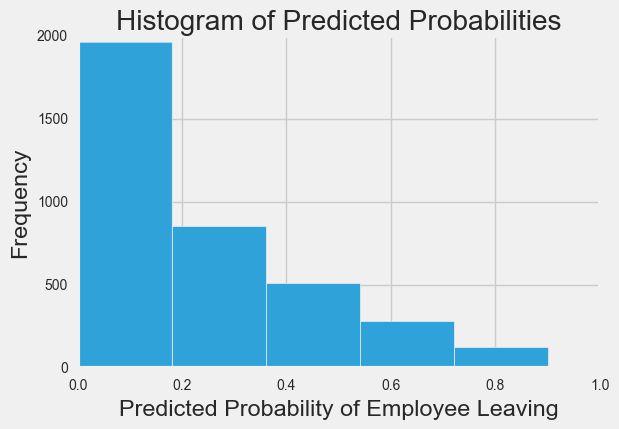

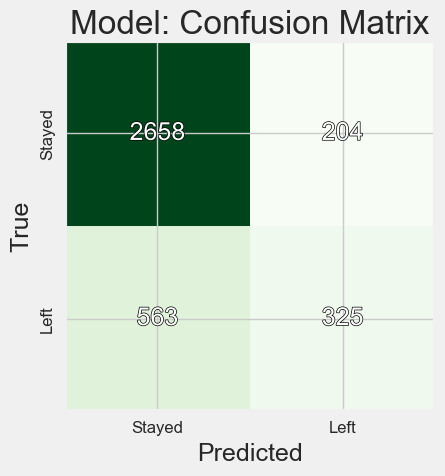

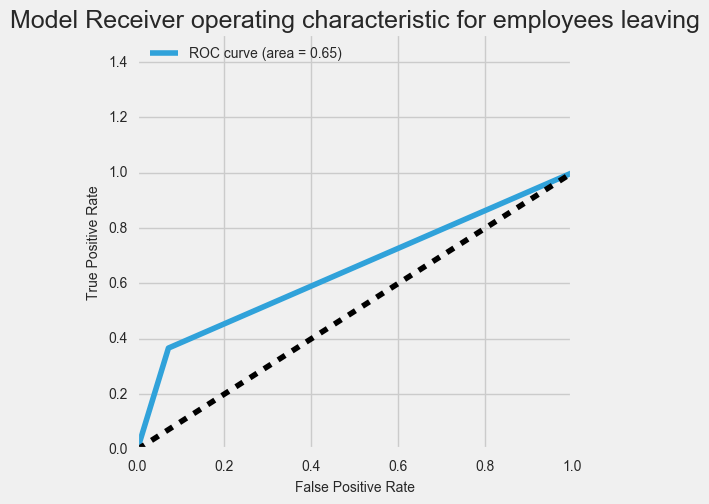

In [372]:
model_stats(model = LogisticRegression(), X_train = X_train, y_train = y_train, y_test = y_test, X_test = X_test)

# K Nearest Neighbors Model

# K=1

In [373]:
# K-Nearest Neighbours with K=1
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

Mean CV Accuracy for Model: 0.96213212714746954 

Confusion Matrix for Model
[[2775   87]
 [  35  853]]


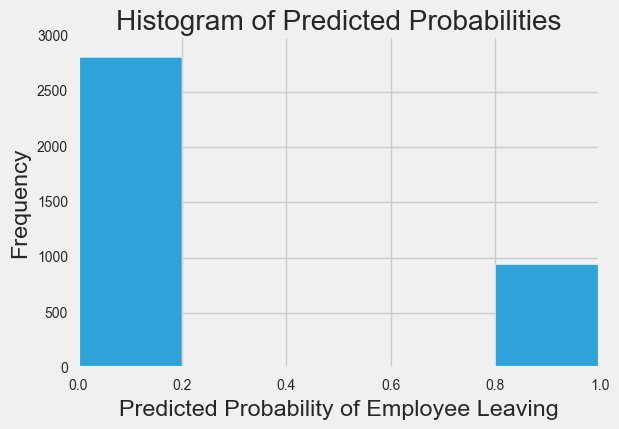

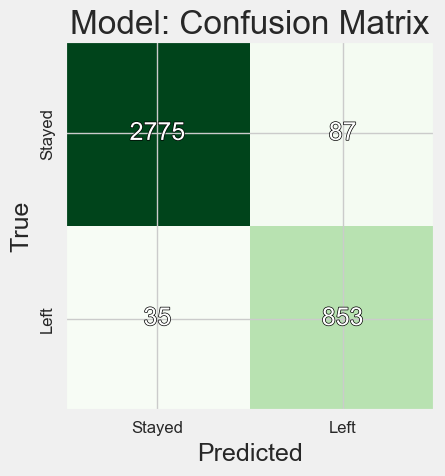

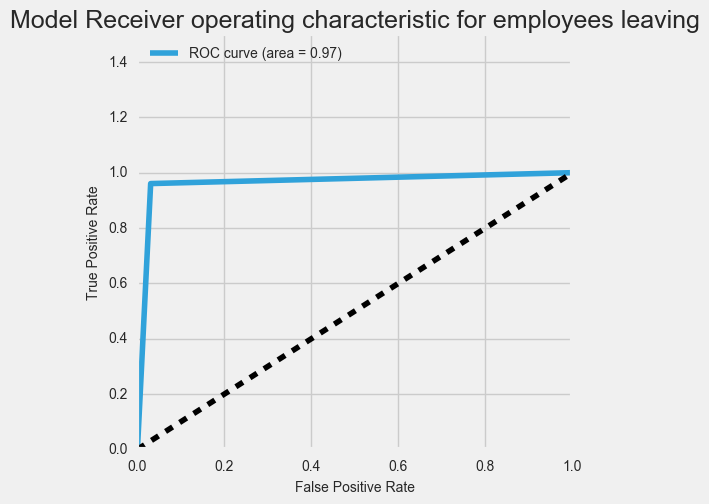

In [374]:
model_stats(model = knn, X_train = X_train, y_train = y_train, y_test = y_test, X_test = X_test)

In [359]:
y = knn.fit(X_train, y_train)

KNN = knn.predict(X_test)
md2 = knn.fit(X_train, y_train)
scores = cross_val_score(md2, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())
confusion = metrics.confusion_matrix(y_test, KNN) 

0.962132127147


In [370]:
# Classification Accuracy confirmation between manual calculation and formula for K=1

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

Classification Accuracy
0.967466666667

Misclassification Accuracy
0.0325333333333

Predicted Positive Accuracy
0.960585585586

Predicted Negative Accuracy
0.969601677149

Actual Positive Prediction Accuracy
0.907446808511


# K=5

In [375]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

Mean CV Accuracy for Model: 0.93777624121469816 

Confusion Matrix for Model
[[2734  128]
 [  91  797]]


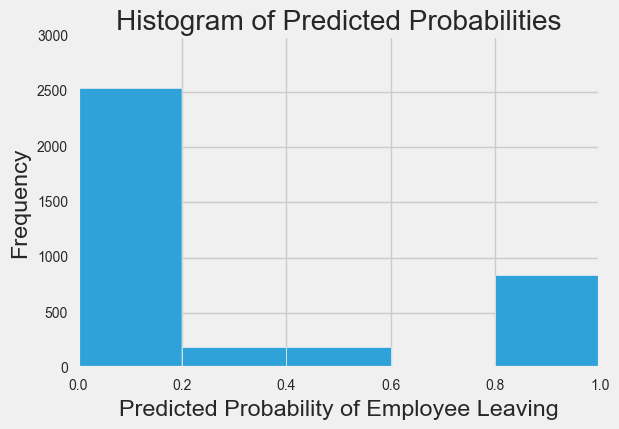

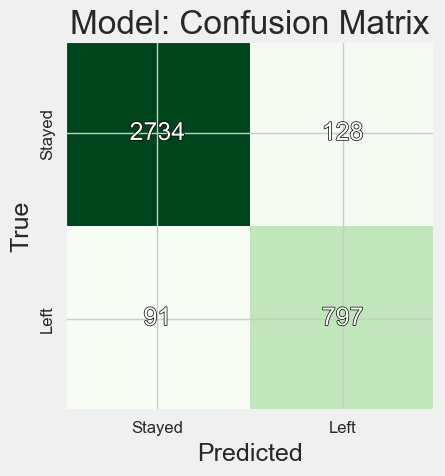

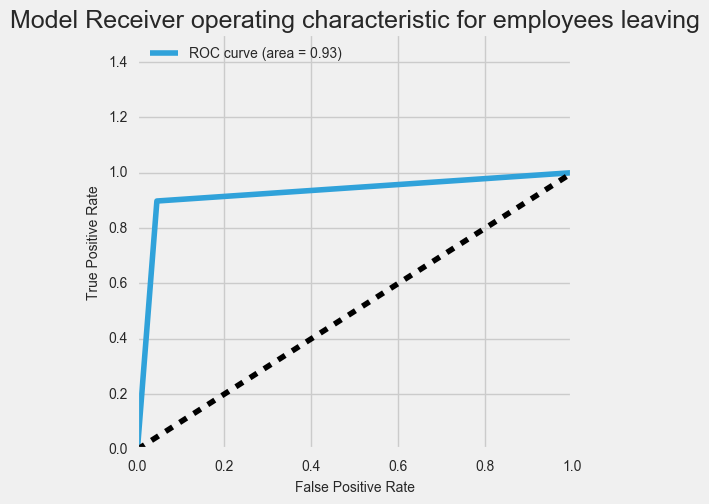

In [376]:
model_stats(model = knn, X_train = X_train, y_train = y_train, y_test = y_test, X_test = X_test)

In [377]:
# K-Nearest Neighbours with K=5

knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
y = knn.fit(X_train, y_train)
KNN5 = knn.predict(X_test)

# sklearn output to check that ran on right data split.

len(KNN5)

# Cross Validation for K=5 Cross-Fold Validation

md2 = knn.fit(X_train, y_train)
scores = cross_val_score(md2, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())
print(metrics.accuracy_score(y_test, KNN5))
confusion = metrics.confusion_matrix(y_test, KNN5)
# print confusion

0.937776241215
0.9416


In [378]:
# Classification Accuracy confirmation between manual calculation and formula for K=1

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

Classification Accuracy
0.967466666667

Misclassification Accuracy
0.0325333333333

Predicted Positive Accuracy
0.960585585586

Predicted Negative Accuracy
0.969601677149

Actual Positive Prediction Accuracy
0.907446808511


Grid Search for optimal N value in KNN

In [379]:
from sklearn.grid_search import GridSearchCV

In [380]:

# k_potentials = list(range(1, 200))

# k_potentials = np.linspace(0,200,40)
k_potentials = [int(x.round()) for x in np.linspace(0,200,40)]
k_potentials = k_potentials[1:]
print(k_potentials)

[5, 10, 15, 21, 26, 31, 36, 41, 46, 51, 56, 62, 67, 72, 77, 82, 87, 92, 97, 103, 108, 113, 118, 123, 128, 133, 138, 144, 149, 154, 159, 164, 169, 174, 179, 185, 190, 195, 200]


In [381]:
# Set Nearest Neighbours equal to k
knn = KNeighborsClassifier(n_neighbors=k_potentials, metric = 'euclidean')
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_potentials)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X_train, y_train)
# view the results
grid.grid_scores_



[mean: 0.93777, std: 0.00749, params: {'n_neighbors': 5},
 mean: 0.93448, std: 0.00843, params: {'n_neighbors': 10},
 mean: 0.92568, std: 0.00729, params: {'n_neighbors': 15},
 mean: 0.91830, std: 0.00862, params: {'n_neighbors': 21},
 mean: 0.91030, std: 0.00907, params: {'n_neighbors': 26},
 mean: 0.90595, std: 0.00846, params: {'n_neighbors': 31},
 mean: 0.89875, std: 0.00952, params: {'n_neighbors': 36},
 mean: 0.89235, std: 0.01016, params: {'n_neighbors': 41},
 mean: 0.88390, std: 0.01020, params: {'n_neighbors': 46},
 mean: 0.87946, std: 0.01104, params: {'n_neighbors': 51},
 mean: 0.87554, std: 0.00938, params: {'n_neighbors': 56},
 mean: 0.87146, std: 0.01061, params: {'n_neighbors': 62},
 mean: 0.86914, std: 0.01118, params: {'n_neighbors': 67},
 mean: 0.86550, std: 0.01031, params: {'n_neighbors': 72},
 mean: 0.86345, std: 0.01038, params: {'n_neighbors': 77},
 mean: 0.85768, std: 0.00867, params: {'n_neighbors': 82},
 mean: 0.85421, std: 0.00979, params: {'n_neighbors': 87}

In [382]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.9377722464219042, 0.9344830651613477, 0.9256822828695884, 0.9183038492310428, 0.9103031380567161, 0.9059471953062495, 0.8987465552493555, 0.8923459863098943, 0.8839007911814384, 0.8794559516401458, 0.8755444928438083, 0.8714552404658192, 0.869143923904347, 0.8654991554804872, 0.8634545292914926, 0.8576762378878122, 0.8542092630456041, 0.8507422882033958, 0.8474531069428394, 0.8399857765134678, 0.8337630011556583, 0.8300293359409725, 0.8301182327317984, 0.8284291937061072, 0.8288736776602365, 0.8283402969152813, 0.8264734643079384, 0.8235398702106854, 0.8236287670015112, 0.8238954573739888, 0.8244288381189439, 0.8246066317005956, 0.8248733220730732, 0.8230064894657303, 0.8228286958840786, 0.823184283047382, 0.8149168815005778, 0.8119832874033247, 0.8085163125611166]


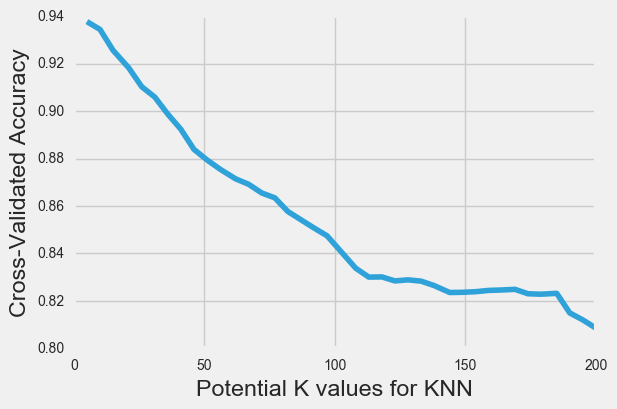

In [383]:

# plot the results (Manhattan distance)
plt.plot(k_potentials, grid_mean_scores)
plt.xlabel('Potential K values for KNN')
plt.ylabel('Cross-Validated Accuracy')

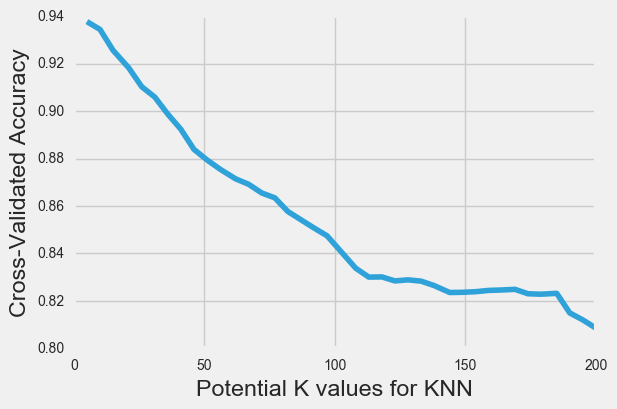

In [384]:
# plot the results (using Euclidean distance)
plt.plot(k_potentials, grid_mean_scores)
plt.xlabel('Potential K values for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [385]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9377722464219042
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


# Support Vector Machines

In [386]:
# # read in the data & create matrices
# X = X_scaled[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", \
#               "time_spend_company", "Work_accident", "promotion_last_5years", "low", "medium",\
#               "technical", "support", "IT", "product_mng", "marketing", "RandD", "accounting",\
#               "hr"]]
# y = X_scaled["left"]

In [387]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [391]:
# Train, fit and predict with SVM
Model=svm.SVC(kernel='linear')
Model.fit(X_train,y_train)
Y_pred=Model.predict(X_test)

In [392]:
# Cross validation score for SVM
scores = cross_val_score(Model, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())
print()
# Evaluate SVM for accuracy
print (metrics.accuracy_score(y_test,Y_pred))
print()
# Confusion matrix for SVM
confusion = metrics.confusion_matrix(y_test, Y_pred)
print (confusion)

0.77793923391

0.779466666667

[[2692  170]
 [ 657  231]]


In [393]:
# Classification Accuracy confirmation between manual calculation and formula for K=1

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

Classification Accuracy
0.779466666667

Misclassification Accuracy
0.220533333333

Predicted Positive Accuracy
0.260135135135

Predicted Negative Accuracy
0.940600978337

Actual Positive Prediction Accuracy
0.576059850374


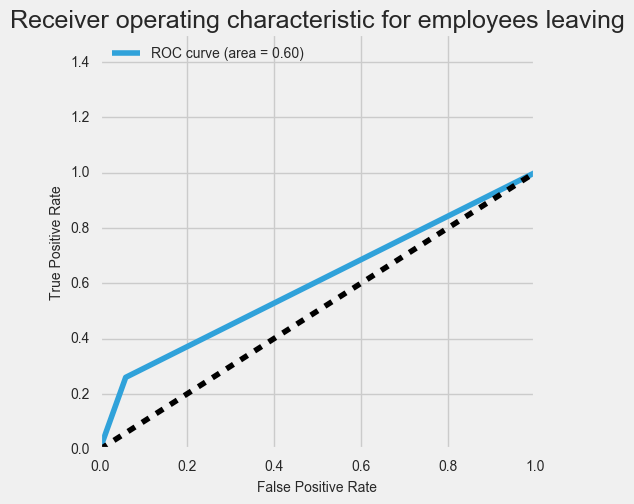

In [394]:
# Roc_curve for Support Vector Machine Model
FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_pred)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

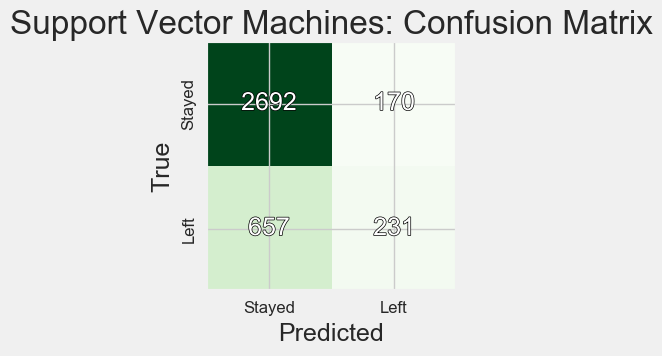

In [395]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)

plot_confusion_matrix(cm, title='Support Vector Machines: Confusion Matrix', \
                      labels=['Stayed', 'Left'], cmap=plt.cm.Greens)

# Random Forest

In [396]:
# Random Forests Classifier from Scikit Learn
RF = RandomForestClassifier(n_jobs=2)

Mean CV Accuracy for Model: 0.98604309287574965 

Confusion Matrix for Model
[[2857    5]
 [  39  849]]


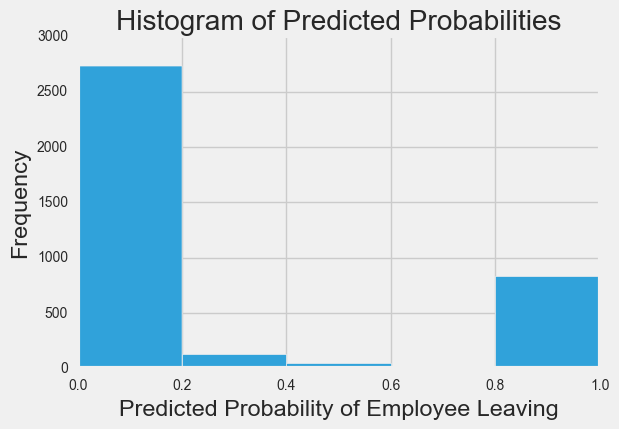

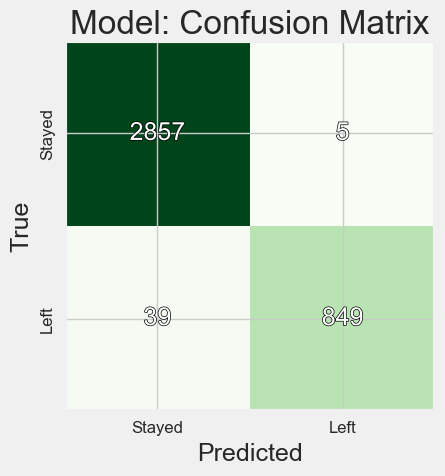

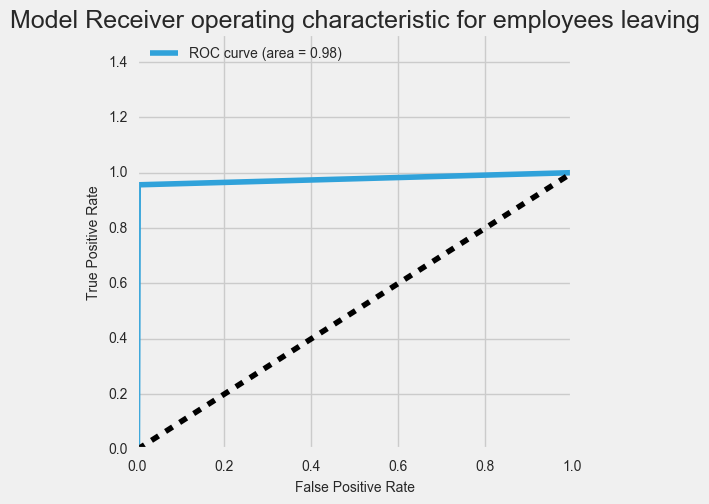

In [397]:
model_stats(model = RF, X_train = X_train, y_train = y_train, y_test = y_test, X_test = X_test)

In [398]:
RF.fit(X_train,y_train)
Y_pred=RF.predict(X_test)
# Score for 10-fold Cross Validation for Random Forests Classifier
scores = cross_val_score(RF, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())
# Prediction Accuracy for Random Forests

print(metrics.accuracy_score(y_test, Y_pred))
# Confusion matrix for Random Forests

confusion = metrics.confusion_matrix(y_test, Y_pred)
print (confusion)

0.98542173986
0.9872
[[2857    5]
 [  43  845]]


In [399]:
# Classification Accuracy confirmation between manual calculation and formula for K=1

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

Classification Accuracy
0.9872

Misclassification Accuracy
0.0128

Predicted Positive Accuracy
0.951576576577

Predicted Negative Accuracy
0.998252969951

Actual Positive Prediction Accuracy
0.994117647059


# Bagging 

In [401]:
# Bagging Classifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
Bagging = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

Mean CV Accuracy for Model: 0.98791023488106355 

Confusion Matrix for Model
[[2853    9]
 [  29  859]]


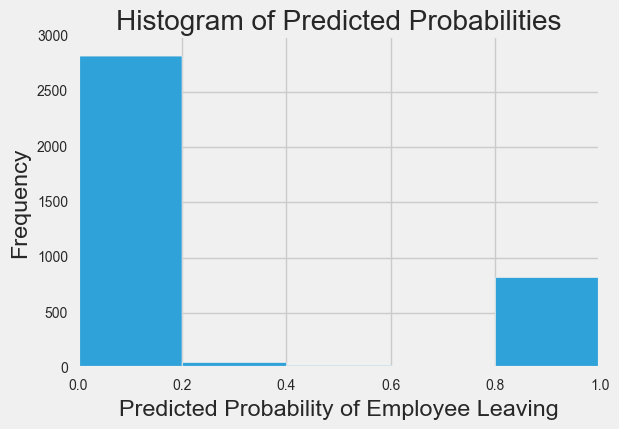

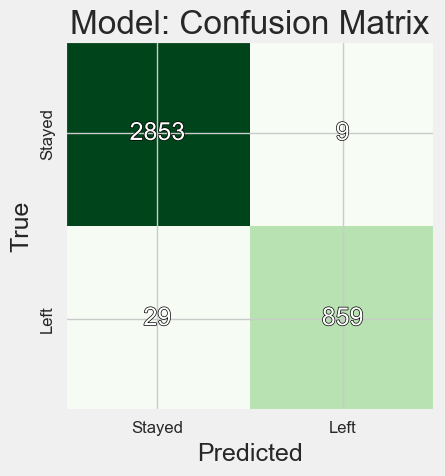

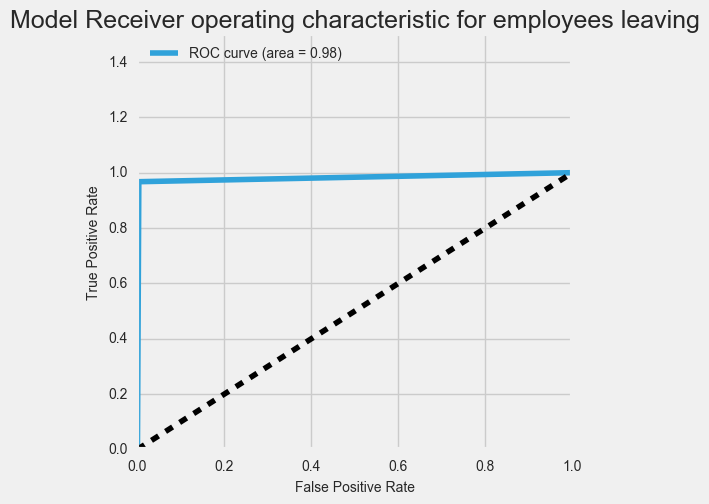

In [402]:
model_stats(model = Bagging, X_train = X_train, y_train = y_train, y_test = y_test, X_test = X_test)

In [403]:
Bagging.fit(X_train,y_train)
Y_pred=Bagging.predict(X_test)
# Cross Validation for Bagging

scores = cross_val_score(Bagging, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())
# Prediction Accuracy for Bagging
print(metrics.accuracy_score(y_test, Y_pred))
# Confusion matrix for Bagging

confusion = metrics.confusion_matrix(y_test, Y_pred)
print (confusion)

0.987910234881
0.989866666667
[[2853    9]
 [  29  859]]


In [404]:
# Classification Accuracy confirmation between manual calculation and formula for the clf

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

Classification Accuracy
0.989866666667

Misclassification Accuracy
0.0101333333333

Predicted Positive Accuracy
0.967342342342

Predicted Negative Accuracy
0.996855345912

Actual Positive Prediction Accuracy
0.989631336406


# AdaBoost

In [407]:
# AdaBoost Classifier

seed = 7
cart = AdaBoostClassifier()
num_trees = 100
AdaBoostClassifier = AdaBoostClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

Mean CV Accuracy for Model: 0.95875363636172095 

Confusion Matrix for Model
[[2794   68]
 [  88  800]]


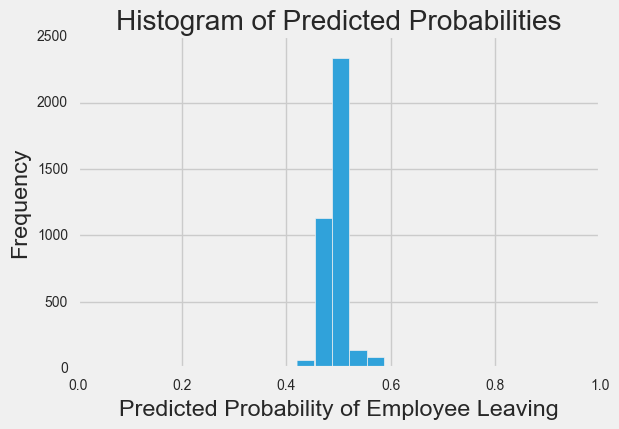

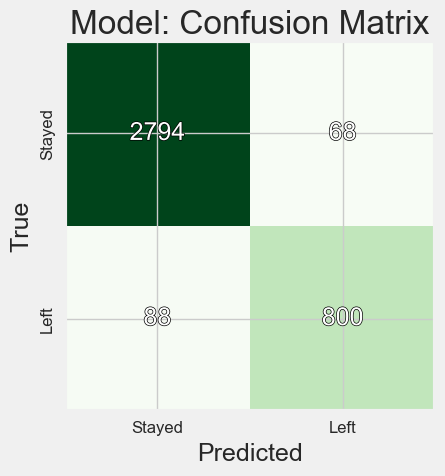

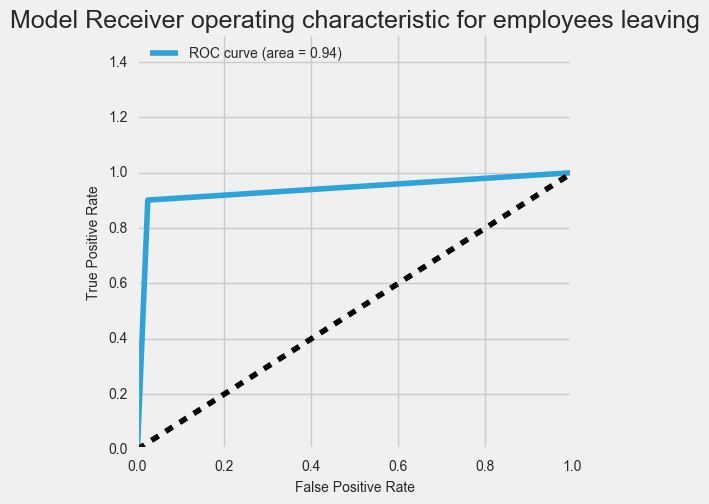

In [408]:
model_stats(model = AdaBoostClassifier, X_train = X_train, y_train = y_train, y_test = y_test, X_test = X_test)

In [409]:
AdaBoostClassifier.fit(X_train,y_train)
Y_pred=AdaBoostClassifier.predict(X_test)

# Cross Validation for AdaBoost
scores = cross_val_score(AdaBoostClassifier, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())
# Prediction Accuracy for AdaBoost

from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))
# Confusion matrix for AdaBoost

confusion = metrics.confusion_matrix(y_test, Y_pred)
print (confusion)

0.958753636362
0.9584
[[2794   68]
 [  88  800]]


In [410]:
# Classification Accuracy confirmation between manual calculation and formula for the clf

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

Classification Accuracy
0.9584

Misclassification Accuracy
0.0416

Predicted Positive Accuracy
0.900900900901

Predicted Negative Accuracy
0.976240391335

Actual Positive Prediction Accuracy
0.921658986175


# Gradient Boosting

In [412]:
# Train and predict Gradient Boosting
GradientBoosting = GradientBoostingClassifier()

Mean CV Accuracy for Model: 0.97644316746346294 

Confusion Matrix for Model
[[2835   27]
 [  67  821]]


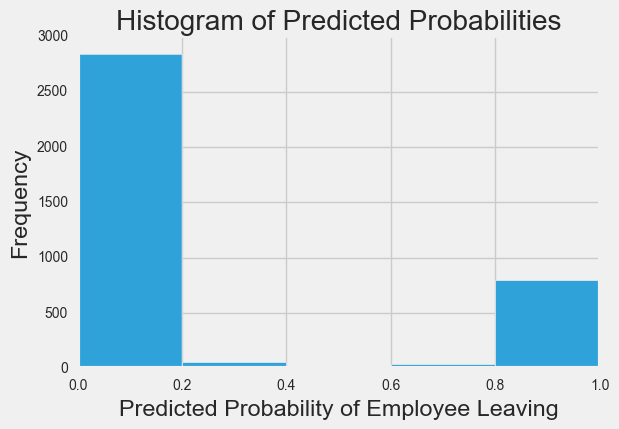

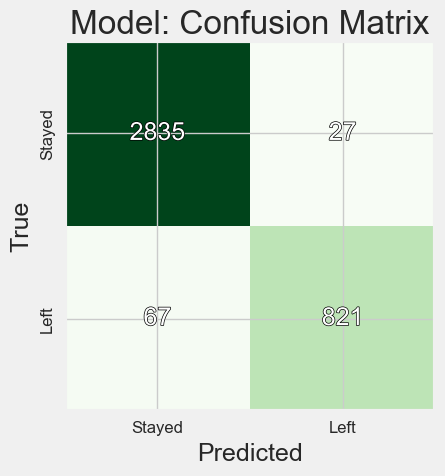

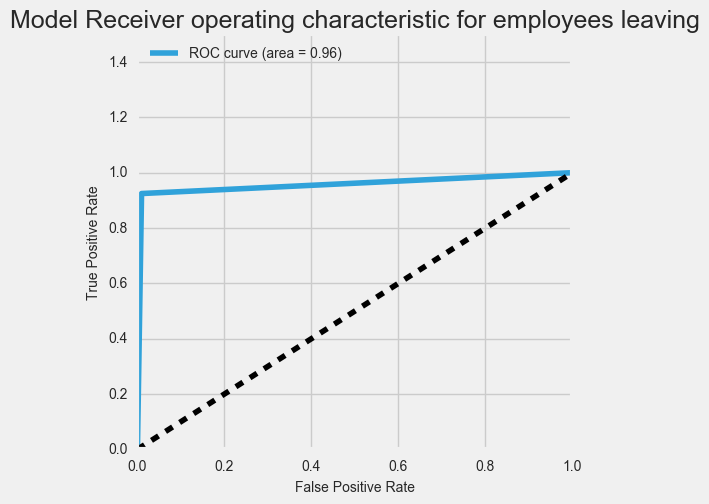

In [413]:
model_stats(model = GradientBoosting, X_train = X_train, y_train = y_train, y_test = y_test, X_test = X_test)

In [415]:
GradientBoosting.fit(X_train,y_train)
Y_pred=GradientBoosting.predict(X_test)
# Cross Validation for Gradient Boosting
scores = cross_val_score(GradientBoosting, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())
# Prediction Accuracy for Gradient Boosting

from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))
# Confusion matrix for Gradient Boosting

confusion = metrics.confusion_matrix(y_test, Y_pred)
print (confusion)

0.976620945241
0.974133333333
[[2832   30]
 [  67  821]]


In [416]:
# Classification Accuracy confirmation between manual calculation and formula for the clf

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print ("Classification Accuracy")
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(y_test, KNN))
print()
print ("Misclassification Accuracy")
# Misclassification Accuracy confirmation between manual calculation and formula for K=1
# This is also simply equal to 1-(Classification Accuracy calculated above).
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(y_test, KNN))
print()
print ("Predicted Positive Accuracy")
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
print(TP / float(TP + FN))
# print(metrics.recall_score(y_test, KNN))
print()
print ("Predicted Negative Accuracy")
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for K=1
print(TN / float(TN + FP))
print()

print ("Actual Positive Prediction Accuracy")
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for K=1
print(TP / float(TP + FP))
# print(metrics.precision_score(y_test, KNN))

Classification Accuracy
0.974133333333

Misclassification Accuracy
0.0258666666667

Predicted Positive Accuracy
0.92454954955

Predicted Negative Accuracy
0.989517819706

Actual Positive Prediction Accuracy
0.964747356052
